In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy

import sunpy
import sunpy.map
import astropy.units as u
from sunpy.net import Fido, attrs as a

import warnings
warnings.filterwarnings("ignore")

# VSO AIA0304

In [3]:
aia_path = "AIA0304/"
aia_file = sorted(os.listdir(aia_path))

In [4]:
aia1 = aia_file[0]

In [5]:
aia1

'aia_lev1_304a_2012_01_01t00_00_08_14z_image_lev1.fits'

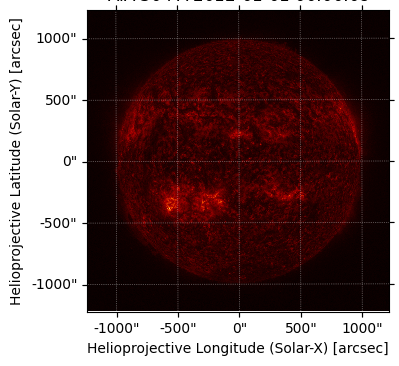

In [6]:
aia_map = sunpy.map.Map(aia_path + aia1)
fig = plt.figure(dpi=100)
aia_map.plot()
plt.show()

In [2]:
aia_map = sunpy.map.Map('20101201_000557_512_0304.jpg')
fig = plt.figure(dpi=100)
aia_map.plot()
plt.show()

OSError: Failed to read 20101201_000557_512_0304.jpg.

/home/ankan2791/.local/lib/python3.6/site-packages/sunpy/map/mapbase.py:2101: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ret = axes.imshow(self.data, **imshow_args)


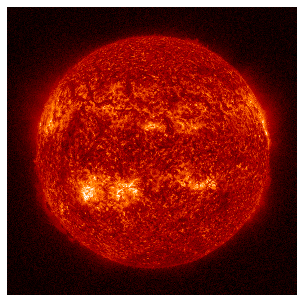

In [7]:
# Setup a frameless figure and an axes which spans the whole canvas.
figure = plt.figure(frameon=False)
axes = plt.Axes(figure, [0., 0., 1., 1.])

# Disable the axis and add them to the figure.
axes.set_axis_off()
figure.add_axes(axes)

# Plot the map without any annotations
# This might raise a warning about the axes being wrong but we can ignore this
# as we are not plotting any axes.
im = aia_map.plot(axes=axes, annotate=False, clip_interval=(1, 99.99)*u.percent)

# HMI

In [8]:
hmi_path = "HMI/"
hmi_file = sorted(os.listdir(hmi_path))

In [9]:
hmi1 = hmi_file[0]

In [10]:
hmi1

'hmi_m_45s_2012_01_01_00_01_30_tai_magnetogram.fits'

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


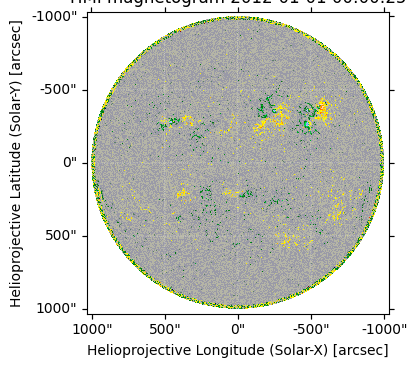

In [14]:
hmi_map = sunpy.map.Map(hmi_path + hmi1)
fig = plt.figure(dpi=100)
hmi_map.plot_settings['cmap'] = "hmimag"
hmi_map.plot()
plt.show()

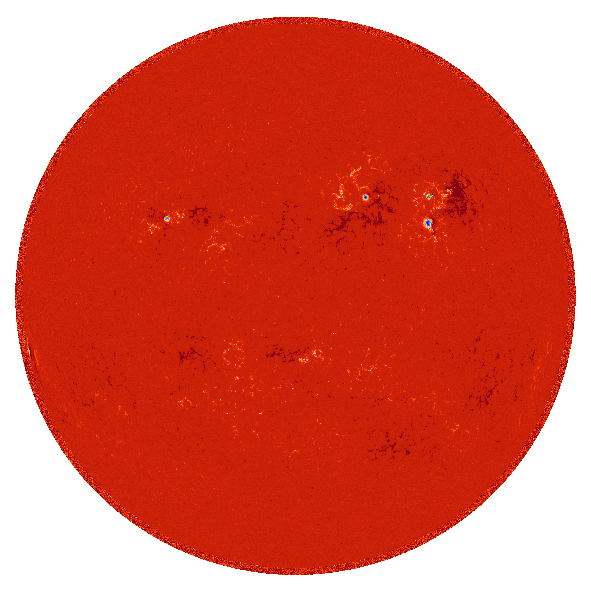

In [65]:
# Setup a frameless figure and an axes which spans the whole canvas.
figure = plt.figure(frameon=False)
axes = plt.Axes(figure, [0., 0., 1., 1.])

# Disable the axis and add them to the figure.
axes.set_axis_off()
figure.add_axes(axes)

# Plot the map without any annotations
# This might raise a warning about the axes being wrong but we can ignore this
# as we are not plotting any axes.
im = hmi_map.plot(axes=axes, annotate=False, clip_interval=(1, 99.99)*u.percent)

# alignment

In [2]:
import matplotlib.pyplot as plt
from reproject import reproject_interp

import astropy.units as u

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

In [15]:
files = [aia_path + aia1, hmi_path + hmi1]

In [31]:
map_aia, map_hmi = [m.resample((512, 512)*u.pix) for m in sunpy.map.Map(sorted(files))]
# Why do we have to do this?
map_hmi.plot_settings['cmap'] = "hmimag"
map_hmi.plot_settings['norm'] = plt.Normalize(-2000, 2000)

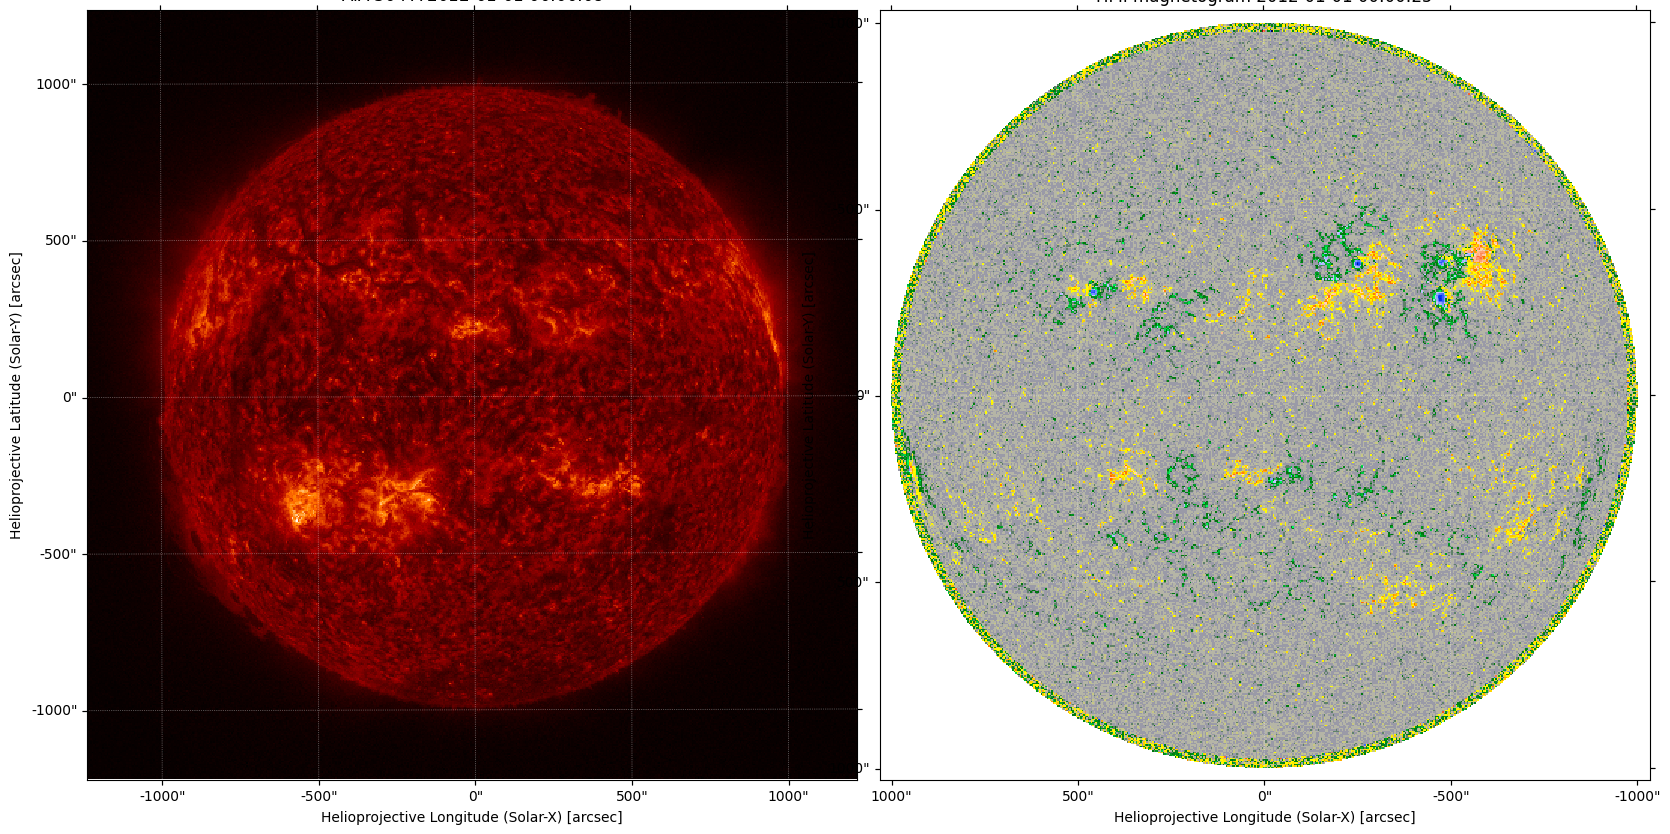

In [32]:
fig = plt.figure(dpi=100)

ax1 = fig.add_subplot(1, 2, 1, projection=map_aia)
map_aia.plot(axes=ax1)

ax2 = fig.add_subplot(1, 2, 2, projection=map_hmi)
map_hmi.plot(axes=ax2)

fig.tight_layout()

In [33]:
output, footprint = reproject_interp(map_hmi, map_aia.wcs, map_aia.data.shape)

In [29]:
plt.rcParams['figure.figsize'] = (16, 8)

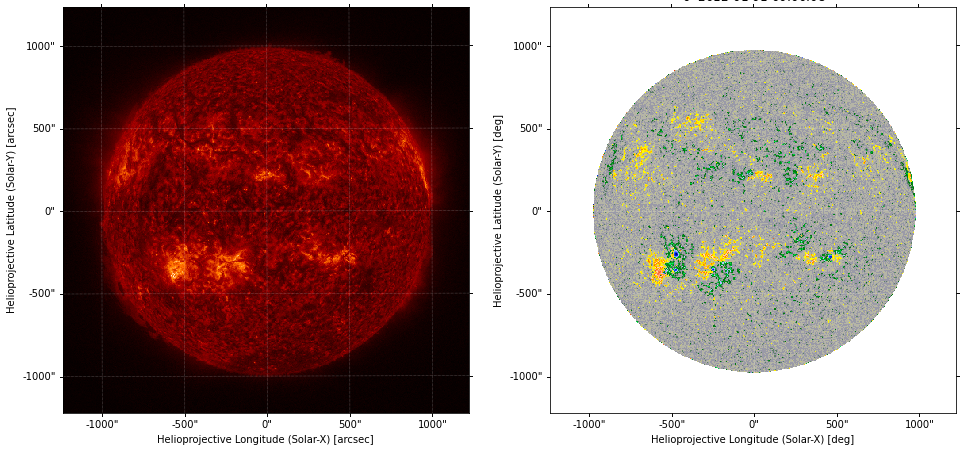

In [34]:
out_hmi = sunpy.map.Map(output, map_aia.wcs)
out_hmi.plot_settings['cmap'] = "hmimag"
out_hmi.plot_settings['norm'] = plt.Normalize(-1500, 1500)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection=map_aia)
map_aia.plot(axes=ax1)
ax2 = fig.add_subplot(1, 2, 2, projection=out_hmi)
out_hmi.plot(axes=ax2)

In [37]:
# save hmi as .fits
out_hmi.save(filepath='./img', filetype='fits')

In [38]:
#  read fits files 
from astropy.io import fits

In [39]:
hdu_list = fits.open('./img')

In [40]:
hdu_list.info()

Filename: ./img
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   (512, 512)   float64   


In [41]:
hdu_list.close()

In [42]:
# or
image_data = fits.getdata('./img')
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(512, 512)


In [64]:
# plt.imshow(image_data, cmap='hmimag')
# plt.savefig('hmi1')

In [45]:
hmi = sunpy.map.Map('./img',)

In [62]:
plt.rc('savefig', facecolor='white')

In [3]:
ls

20101201_000557_512_0304.jpg  get_nasa_jsoc_data.ipynb  jscodata.ipynb
20101201_001041_512_HMIB.jpg  hmi1.png                  jsoc_data_prep.ipynb
check_data.ipynb              img                       sunpy/


In [ ]:
files = ['20101201_000557_512_0304.jpg', '20101201_001041_512_HMIB.jpg']

TypeError: Image data of dtype <U28 cannot be converted to float

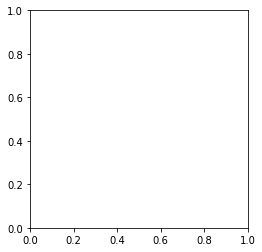

In [4]:
plt.imshow('20101201_001041_512_HMIB.jpg')